In [ ]:
!pip3 install imblearn
!pip3 install xgboost

Only need to run the above if you don't have those libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

import pickle

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
df = pd.read_csv('df_clean.csv')
df

,AppName,Category,Price,Size,ContentRating,AdSupported,InAppPurchases,EditorsChoice,AppAge,DaysSinceLastUpdate,GoodApp
0,Dodge The Cars!,Racing,0.0,52224.0,Everyone,False,False,False,320,320,False
1,Block Fill: Puzzle Game,Puzzle,0.0,16384.0,Everyone,True,True,False,459,400,False
2,Sticky Ball,Arcade,0.0,25600.0,Everyone,True,True,False,1198,1177,False
3,Extrude Balance,Arcade,0.0,26624.0,Everyone,True,True,False,708,45,False
4,Bowling Paradise Pro FREE,Sports,0.0,38912.0,Everyone,True,True,False,2971,2278,False
...,...,...,...,...,...,...,...,...,...,...,...
214476,Contactix,Strategy,0.0,1638.4,Everyone,False,False,False,2763,1475,False
214477,La Molina,Sports,0.0,45056.0,Everyone,False,False,False,1415,85,False
214478,Shield Runner,Arcade,0.0,22528.0,Everyone,True,False,False,1903,1895,False
214479,Hopeless 2: Cave Escape,Action,0.0,37888.0,Teen,True,True,False,2057,1563,True


In [3]:
df.drop(['AppName'], axis = 1, inplace = True)

In [4]:
df.dtypes

Category                object
Price                  float64
Size                   float64
ContentRating           object
AdSupported               bool
InAppPurchases            bool
EditorsChoice             bool
AppAge                   int64
DaysSinceLastUpdate      int64
GoodApp                   bool
dtype: object

# Encode categorical variables to dummy variables

In [5]:
df = pd.get_dummies(df)
pd.set_option('display.max_columns', None)
df

,Price,Size,AdSupported,InAppPurchases,EditorsChoice,AppAge,DaysSinceLastUpdate,GoodApp,Category_Action,Category_Adventure,Category_Arcade,Category_Board,Category_Card,Category_Casino,Category_Casual,Category_Educational,Category_Music,Category_Puzzle,Category_Racing,Category_Role Playing,Category_Simulation,Category_Sports,Category_Strategy,Category_Trivia,Category_Word,ContentRating_Adults only 18+,ContentRating_Everyone,ContentRating_Everyone 10+,ContentRating_Mature 17+,ContentRating_Teen
0,0.0,52224.0,False,False,False,320,320,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0.0,16384.0,True,True,False,459,400,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0.0,25600.0,True,True,False,1198,1177,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.0,26624.0,True,True,False,708,45,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.0,38912.0,True,True,False,2971,2278,False,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214476,0.0,1638.4,False,False,False,2763,1475,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
214477,0.0,45056.0,False,False,False,1415,85,False,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
214478,0.0,22528.0,True,False,False,1903,1895,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
214479,0.0,37888.0,True,True,False,2057,1563,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Create predictor and response dataframe

In [6]:
x = df.drop(['GoodApp'], axis = 1)
y = df[['GoodApp']]

# Do a 70:30 train-test split, with seed set as 0

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [8]:
print('Number of data in train set:', x_train.shape[0])
print('Number of data in test set:', x_test.shape[0])

Number of data in train set: 150136
Number of data in test set: 64345


# Correct Class Imbalance in the Train Set

In [9]:
y_train.value_counts()

GoodApp
False      138965
True        11171
dtype: int64

Very imbalanced classes, with about 13:1 ratio. This is not suprising as the number of good apps is expected to be less than the number of not good apps. We will correct the class imbalance using the SMOTE method.

In [10]:
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

In [11]:
print('Number of data in train set:', x_train.shape[0])

Number of data in train set: 277930


In [12]:
y_train.value_counts()

GoodApp
True       138965
False      138965
dtype: int64

We can see that the number of data in the trainset has increased from 150,136 to 277,930 with SMOTE. The class imbalance issue in the trainset is also fixed as the ratio of true is to false is now 1:1.

# Function for Prediction and Producing the Confusion Matrix + its Metrics

In [13]:
def prediction_metrics(x, model, y_test):
    y_pred = model.predict(x)
    cm = confusion_matrix(y_test, y_pred)
    s = sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})
    s.set(xlabel='Predicted', ylabel='Actual')
    
    tp = cm[1][1]
    fp = cm[0][1]
    tn = cm[0][0]
    fn = cm[1][0]

    print("Overall Accuracy Rate: \t", (tp+tn)/(tp+fp+tn+fn))
    print("TPR:\t", (tp/(tp + fn)))
    print("TNR:\t", (tn/(tn + fp)))
    print("FPR:\t", (fp/(tn + fp)))
    print("FNR:\t", (fn/(tp + fn)))

Confusion Matrix Interpretation:  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives

# Logistic Regression

In [14]:
lr_model = LogisticRegression(random_state = 0, max_iter = 500).fit(x_train, y_train.values.ravel())

Trainset Metrics

Overall Accuracy Rate: 	 0.6975389486561364
TPR:	 0.8328499982009858
TNR:	 0.562227899111287
FPR:	 0.437772100888713
FNR:	 0.16715000179901415


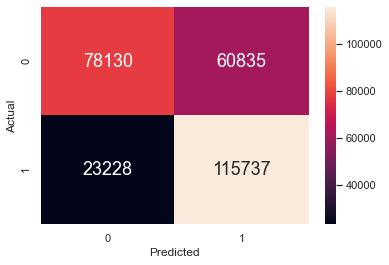

In [15]:
print('Trainset Metrics\n')
prediction_metrics(x_train, lr_model, y_train)

Testset Metrics

Overall Accuracy Rate: 	 0.5804025176781412
TPR:	 0.8292268479184367
TNR:	 0.5607592601908211
FPR:	 0.4392407398091789
FNR:	 0.1707731520815633


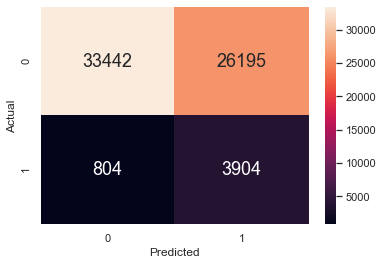

In [16]:
print('Testset Metrics\n')
prediction_metrics(x_test, lr_model, y_test)

*Note*: No feature importance for logistic regression as all variables need to have the same scale prior to fitting the model, in order to derive feature importance (by looking at the coefficient of each predictor variable). When we attempted to normalise the data (using code from [this link](https://www.stackvidhya.com/how-to-normalize-data-between-0-and-1-range/#:~:text=You%20can%20normalize%20data%20between,min(data))), the false negative rate increased significantly. 

Furthermore, we would have to use the normalised data on the other models, so we decided to retain the numeric data as they are, and not scale them.

# Random Forest

In [17]:
rf_model = RandomForestClassifier(n_estimators = 500).fit(x_train, y_train.values.ravel())

Trainset Metrics

Overall Accuracy Rate: 	 0.999985607886878
TPR:	 0.999978411830317
TNR:	 0.999992803943439
FPR:	 7.19605656100457e-06
FNR:	 2.1588169683013707e-05


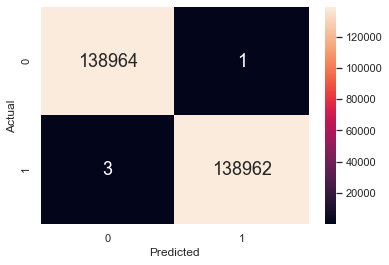

In [18]:
print('Trainset Metrics\n')
prediction_metrics(x_train, rf_model, y_train)

Testset Metrics

Overall Accuracy Rate: 	 0.9282617141969073
TPR:	 0.31032285471537807
TNR:	 0.9770444522695642
FPR:	 0.022955547730435802
FNR:	 0.6896771452846219


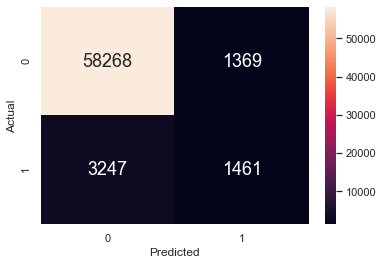

In [19]:
print('Testset Metrics\n')
prediction_metrics(x_test, rf_model, y_test)

### Random Forest: Feature Importance (code from [here](https://machinelearningmastery.com/calculate-feature-importance-with-python/))

Feature: 0, Score: 0.00185
Feature: 1, Score: 0.09019
Feature: 2, Score: 0.05526
Feature: 3, Score: 0.21685
Feature: 4, Score: 0.00328
Feature: 5, Score: 0.12829
Feature: 6, Score: 0.11389
Feature: 7, Score: 0.02030
Feature: 8, Score: 0.01826
Feature: 9, Score: 0.03286
Feature: 10, Score: 0.01048
Feature: 11, Score: 0.01068
Feature: 12, Score: 0.00605
Feature: 13, Score: 0.02447
Feature: 14, Score: 0.01193
Feature: 15, Score: 0.00401
Feature: 16, Score: 0.03182
Feature: 17, Score: 0.01069
Feature: 18, Score: 0.01086
Feature: 19, Score: 0.01980
Feature: 20, Score: 0.02662
Feature: 21, Score: 0.00933
Feature: 22, Score: 0.01208
Feature: 23, Score: 0.01153
Feature: 24, Score: 0.00005
Feature: 25, Score: 0.05485
Feature: 26, Score: 0.01816
Feature: 27, Score: 0.00961
Feature: 28, Score: 0.03596


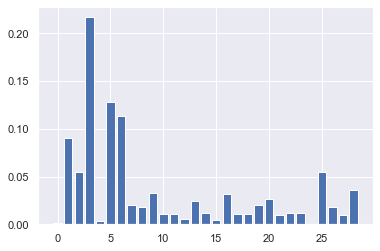

In [20]:
rfimportance = rf_model.feature_importances_

# summarise feature importance
for i,v in enumerate(rfimportance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(rfimportance))], rfimportance)
plt.show()

In [21]:
top4indices = np.argpartition(rfimportance, -4)[-4:]
top4indices[np.argsort(rfimportance[top4indices])]
x_train.iloc[:,top4indices].columns

Index(['Size', 'DaysSinceLastUpdate', 'AppAge', 'InAppPurchases'], dtype='object')

The feature importance is as follows, in order of descending importance: 
1. InAppPurchases
2. AppAge
3. DaysSinceLastUpdate
4. Size

# Random Forest with XGBoost

In [22]:
xgbrf_model = xgb.XGBRFClassifier(n_estimators = 500, subsample = 0.9, colsample_bynode = 0.2).fit(x_train, y_train)

Trainset Metrics

Overall Accuracy Rate: 	 0.860479257366963
TPR:	 0.877156118447091
TNR:	 0.8438023962868348
FPR:	 0.15619760371316518
FNR:	 0.12284388155290901


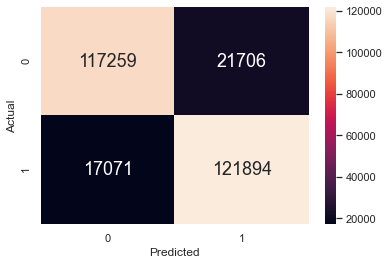

In [23]:
print('Trainset Metrics\n')
prediction_metrics(x_train, xgbrf_model, y_train)

Testset Metrics

Overall Accuracy Rate: 	 0.8274457999844588
TPR:	 0.5915463041631266
TNR:	 0.8460687157301675
FPR:	 0.1539312842698325
FNR:	 0.4084536958368734


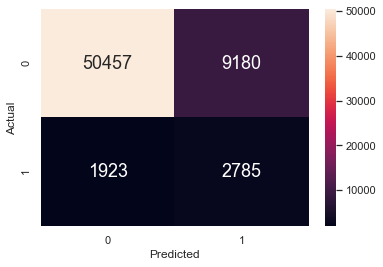

In [24]:
print('Testset Metrics\n')
prediction_metrics(x_test, xgbrf_model, y_test)

### Random Forest with XGBoost: Feature Importance (code from [here](https://machinelearningmastery.com/calculate-feature-importance-with-python/))

Feature: 0, Score: 0.00059
Feature: 1, Score: 0.02920
Feature: 2, Score: 0.07659
Feature: 3, Score: 0.27351
Feature: 4, Score: 0.00496
Feature: 5, Score: 0.02224
Feature: 6, Score: 0.03614
Feature: 7, Score: 0.03056
Feature: 8, Score: 0.02941
Feature: 9, Score: 0.06909
Feature: 10, Score: 0.00759
Feature: 11, Score: 0.00738
Feature: 12, Score: 0.01545
Feature: 13, Score: 0.03608
Feature: 14, Score: 0.01266
Feature: 15, Score: 0.00096
Feature: 16, Score: 0.05377
Feature: 17, Score: 0.01341
Feature: 18, Score: 0.01065
Feature: 19, Score: 0.02606
Feature: 20, Score: 0.05040
Feature: 21, Score: 0.00624
Feature: 22, Score: 0.01749
Feature: 23, Score: 0.01155
Feature: 24, Score: 0.00003
Feature: 25, Score: 0.08500
Feature: 26, Score: 0.01892
Feature: 27, Score: 0.01262
Feature: 28, Score: 0.04147


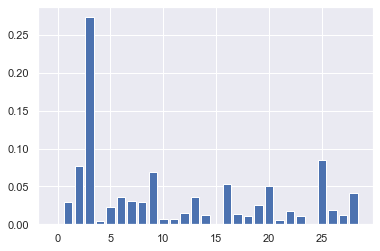

In [25]:
rximportance = xgbrf_model.feature_importances_

# summarise feature importance
for i,v in enumerate(rximportance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(rximportance))], rximportance)
plt.show()

InAppPurchases is by far the most important feature here

# AdaBoost

In [26]:
ab_model = AdaBoostClassifier().fit(x_train, y_train.values.ravel())

Trainset Metrics

Overall Accuracy Rate: 	 0.9272586622530853
TPR:	 0.919692008779189
TNR:	 0.9348253157269816
FPR:	 0.06517468427301838
FNR:	 0.08030799122081099


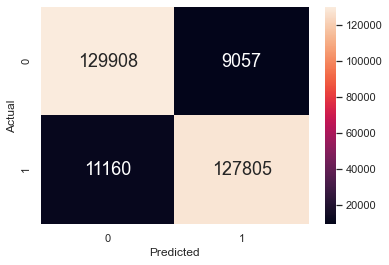

In [27]:
print('Trainset Metrics\n')
prediction_metrics(x_train, ab_model, y_train)

Testset Metrics

Overall Accuracy Rate: 	 0.898857720102572
TPR:	 0.4369158878504673
TNR:	 0.9353253852474135
FPR:	 0.06467461475258648
FNR:	 0.5630841121495327


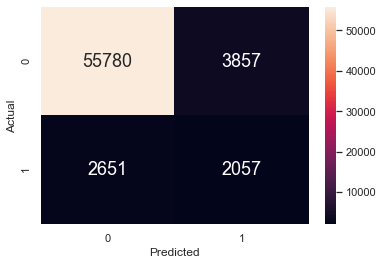

In [28]:
print('Testset Metrics\n')
prediction_metrics(x_test, ab_model, y_test)

### AdaBoost: Feature Importance (code from [here](https://machinelearningmastery.com/calculate-feature-importance-with-python/))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.02000
Feature: 2, Score: 0.02000
Feature: 3, Score: 0.04000
Feature: 4, Score: 0.02000
Feature: 5, Score: 0.06000
Feature: 6, Score: 0.04000
Feature: 7, Score: 0.04000
Feature: 8, Score: 0.04000
Feature: 9, Score: 0.06000
Feature: 10, Score: 0.02000
Feature: 11, Score: 0.02000
Feature: 12, Score: 0.02000
Feature: 13, Score: 0.06000
Feature: 14, Score: 0.04000
Feature: 15, Score: 0.02000
Feature: 16, Score: 0.06000
Feature: 17, Score: 0.04000
Feature: 18, Score: 0.04000
Feature: 19, Score: 0.06000
Feature: 20, Score: 0.04000
Feature: 21, Score: 0.02000
Feature: 22, Score: 0.04000
Feature: 23, Score: 0.02000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.06000
Feature: 26, Score: 0.02000
Feature: 27, Score: 0.02000
Feature: 28, Score: 0.06000


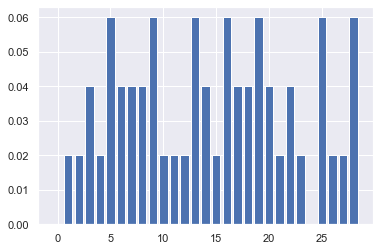

In [29]:
abimportance = ab_model.feature_importances_

# summarise feature importance
for i,v in enumerate(abimportance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(abimportance))], abimportance)
plt.show()

In [30]:
top6indices = np.argpartition(abimportance, -6)[-6:]
top6indices[np.argsort(abimportance[top6indices])]
x_train.iloc[:,top6indices].columns

Index(['ContentRating_Everyone', 'Category_Puzzle', 'Category_Simulation',
       'Category_Arcade', 'Category_Casual', 'ContentRating_Teen'],
      dtype='object')

The feature importance for AdaBoost is as follows, in order of descending importance: 
1. DaysSinceLastUpdate
2. Category_Casual = Category_Arcarde = Category_Puzzle = AppAge = Content_Rating_Everyone

# Save/Load the ML models here

In [31]:
# save
pickle.dump(lr_model, open('lr_model.sav', 'wb'))
pickle.dump(rf_model, open('rf_model.sav', 'wb'))
pickle.dump(xgbrf_model, open('xgbrf_model.sav', 'wb'))
pickle.dump(ab_model, open('ab_model.sav', 'wb'))

In [32]:
# load
lr_model = pickle.load(open('lr_model.sav', 'rb'))
rf_model = pickle.load(open('rf_model.sav', 'rb'))
xgbrf_model = pickle.load(open('xgbrf_model.sav', 'rb'))
ab_model = pickle.load(open('ab_model.sav', 'rb'))